# 1. Install Dependencies and Setup

In [3]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "c:\Users\drago\anaconda3\envs\pt\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\drago\anaconda3\envs\pt\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\drago\anaconda3\envs\pt\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [4]:
pip list

Package                   Version
------------------------- ---------
absl-py                   2.1.0
albumentations            1.4.6
altair                    5.3.0
annotated-types           0.6.0
anyio                     4.4.0
appdirs                   1.4.4
asttokens                 2.4.1
astunparse                1.6.3
attrs                     23.2.0
audioread                 3.0.1
beautifulsoup4            4.12.3
blinker                   1.7.0
cachetools                5.3.3
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
coloredlogs               15.0.1
comm                      0.1.4
comtypes                  1.4.2
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.0
decorator                 5.1.1
distro                    1.9.0
exceptiongroup            1.2.0
executing                 2.0.1
filelock                  

In [6]:
pip install --upgrade tensorflow



   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.2 MB 5.5 MB/s eta 0:01:11
   ---------------------------------------- 0.5/385.2 MB 5.9 MB/s eta 0:01:06
   ---------------------------------------- 0.9/385.2 MB 7.0 MB/s eta 0:00:56
   ---------------------------------------- 1.3/385.2 MB 7.3 MB/s eta 0:00:53
   ---------------------------------------- 1.7/385.2 MB 7.9 MB/s eta 0:00:49
   ---------------------------------------- 2.0/385.2 MB 7.5 MB/s eta 0:00:52
   ---------------------------------------- 2.2/385.2 MB 7.3 MB/s eta 0:00:53
   ---------------------------------------- 2.2/385.2 MB 6.7 MB/s eta 0:00:57
   ---------------------------------------- 2.6/385.2 MB 6.6 MB/s eta 0:00:58
   ---------------------------------------- 2.9/385.2 MB 6.9 MB/s eta 0:00:56
   ---------------------------------------- 3.3/385.2 MB 6.8 MB/s eta 0:00:57
   ---------------------------------------- 3.7/385.2 MB 7.0 MB/s eta 

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.16.0 requires tensorflow<2.17,>=2.16, but you have tensorflow 2.17.0 which is incompatible.


In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

C:\Users\drago\AppData\Local\Temp\ipykernel_26812\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

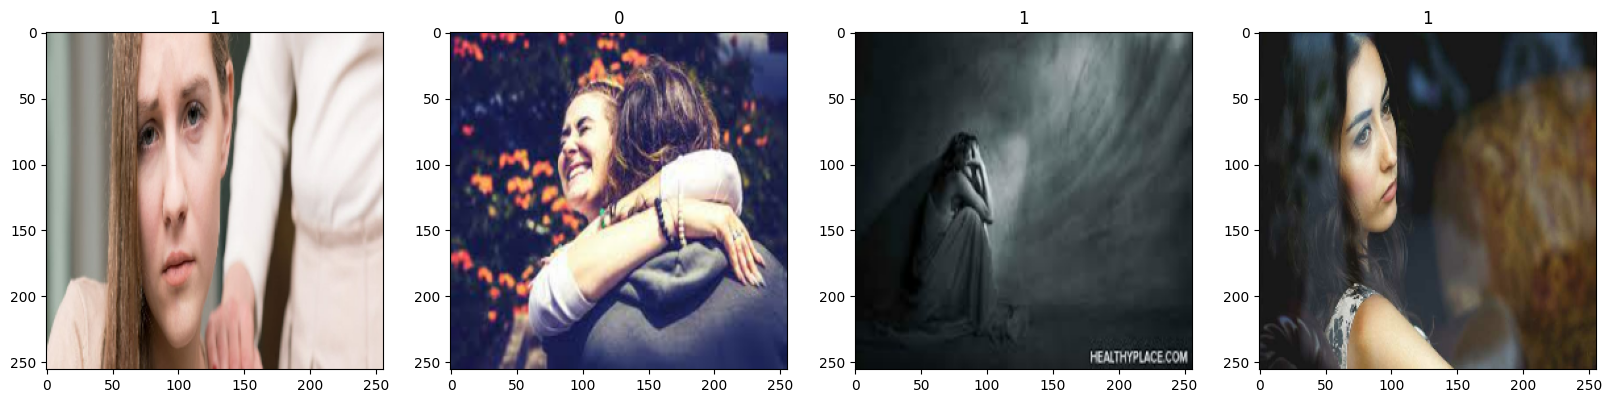

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.1264706 , 0.16568628, 0.1872549 ],
          [0.11666667, 0.16764706, 0.19901961],
          [0.10392157, 0.15490197, 0.18627451],
          ...,
          [0.21372549, 0.28039217, 0.3509804 ],
          [0.20294118, 0.26960784, 0.33235294],
          [0.21078432, 0.27745098, 0.34019607]],
 
         [[0.11666667, 0.15588236, 0.17745098],
          [0.11372549, 0.16470589, 0.19607843],
          [0.10980392, 0.16078432, 0.19215687],
          ...,
          [0.21862745, 0.28529412, 0.35588235],
          [0.22156863, 0.2882353 , 0.3509804 ],
          [0.21960784, 0.28627452, 0.34901962]],
 
         [[0.13137256, 0.17058824, 0.19215687],
          [0.11372549, 0.16470589, 0.19607843],
          [0.10980392, 0.16078432, 0.19215687],
          ...,
          [0.2127451 , 0.27941176, 0.35      ],
          [0.22058824, 0.28921568, 0.3509804 ],
          [0.22745098, 0.29411766, 0.35686275]],
 
         ...,
 
         [[0.3745098 , 0.3627451 , 0.3647059 ],
          [0.59215

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\drago\anaconda3\envs\pt\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 480ms/step - accuracy: 0.5048 - loss: 0.9597 - val_accuracy: 0.5312 - val_loss: 0.6833
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step - accuracy: 0.6445 - loss: 0.6713 - val_accuracy: 0.6875 - val_loss: 0.5658
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 443ms/step - accuracy: 0.6702 - loss: 0.5976 - val_accuracy: 0.5625 - val_loss: 0.7572
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 447ms/step - accuracy: 0.7533 - loss: 0.5077 - val_accuracy: 0.7188 - val_loss: 0.4883
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 444ms/step - accuracy: 0.8289 - loss: 0.4452 - val_accuracy: 0.8750 - val_loss: 0.3384
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 447ms/step - accuracy: 0.8576 - loss: 0.3304 - val_accuracy: 0.9375 - val_loss: 0.2847
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 435ms/step - accuracy: 0.9303 - loss: 0.2290 - val_accuracy: 0.9688 - val_loss: 0.1691
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 488ms/step - accuracy: 0.9484 - loss: 0.2069 - val_accuracy: 0.9844 - val_loss:

In [28]:
hist.history

{'accuracy': [0.46875,
  0.6339285969734192,
  0.71875,
  0.75,
  0.84375,
  0.8928571343421936,
  0.9107142686843872,
  0.9375,
  0.96875,
  0.9464285969734192,
  0.96875,
  0.9732142686843872,
  0.9910714030265808,
  0.9910714030265808,
  0.9910714030265808,
  0.9910714030265808,
  0.9955357313156128,
  0.9821428656578064,
  0.9866071343421936,
  0.9955357313156128],
 'loss': [0.891564667224884,
  0.6625534892082214,
  0.5596055388450623,
  0.5416930913925171,
  0.4406959116458893,
  0.31455332040786743,
  0.25847798585891724,
  0.20724208652973175,
  0.13266733288764954,
  0.13585583865642548,
  0.10981366783380508,
  0.0961073711514473,
  0.06192631646990776,
  0.035674259066581726,
  0.033525511622428894,
  0.028982071205973625,
  0.034141041338443756,
  0.03904852271080017,
  0.03787575289607048,
  0.017247093841433525],
 'val_accuracy': [0.53125,
  0.6875,
  0.5625,
  0.71875,
  0.875,
  0.9375,
  0.96875,
  0.984375,
  0.96875,
  0.96875,
  0.921875,
  0.96875,
  0.984375,
  1.

# 8. Plot Performance

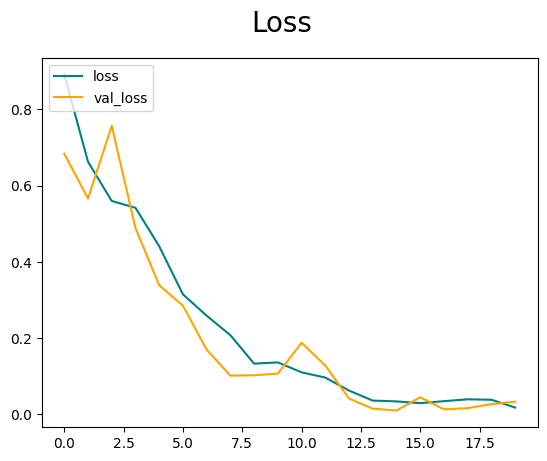

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

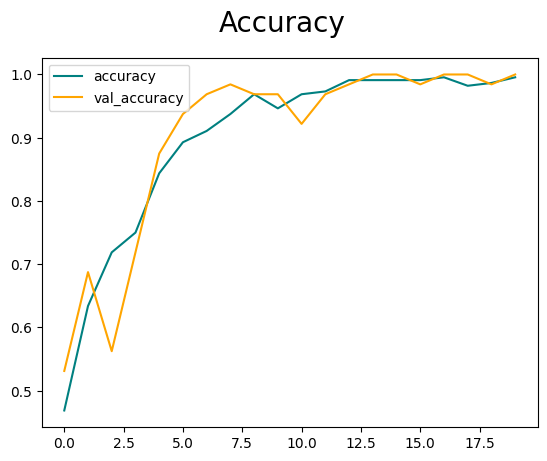

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [34]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.9 1.0 0.9411765


# 10. Test

In [35]:
import cv2

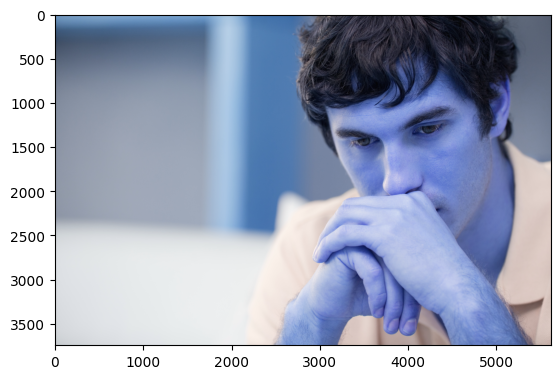

In [92]:
img = cv2.imread('sad.jpg')
plt.imshow(img)
plt.show()

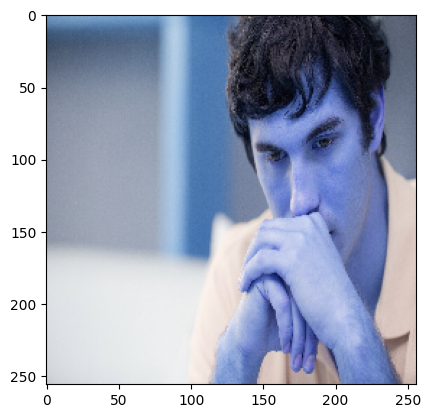

In [93]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [94]:
 np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [95]:
yhat = model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [96]:
yhat

array([[1.]], dtype=float32)

In [97]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [98]:
from tensorflow.keras.models import load_model

In [99]:
model.save(os.path.join('models','happysad.keras'))

In [100]:
new_model = load_model(os.path.join('models','happysad.keras'))

c:\Users\drago\anaconda3\envs\pt\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [102]:
new_model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[1.]], dtype=float32)